# Understanding Sound
This notebook gives an introduction to how computers handle and process sound

#### run global setup

In [1]:
try:
    with open("../global_setup.py") as setupfile:
        exec(setupfile.read())
except FileNotFoundError:
    print('Setup already completed')

#### run local setup

In [2]:
from notebooks.exercises.src.understanding_sound import SoundPlotter, miniSound, SoundPlotter2, \
    SoundPlotter3, spectrogramAnimation
from src.audio.live_spectrogram import LiveSpectrogram, run_livespec
from src.audio.mini_recorder import miniRecorder

# Understanding sound
sources:  
https://medium.com/@ageitgey/machine-learning-is-fun-part-6-how-to-do-speech-recognition-with-deep-learning-28293c162f7a  
https://en.wikipedia.org/wiki/Spectral_density  
https://blogs.technet.microsoft.com/machinelearning/2018/01/30/hearing-ai-getting-started-with-deep-learning-for-audio-on-azure/  

## flow
Plot with slider for frequency of sinus, maybe button for playing the tone  
Plot of frequency spectrum for sinus  
Adding two sinuses - plot waveform and frequency spectrum  
Adding three sinuses - plot waveform and frequency spectrum  
Recorded sound signal
- plot waveform and frequency spectrum
- sliding window for calculating freq spectrum 
- showing freq spectrum as colors

Spectrogram

# What is sound
Airwaves -> condensator microphone -> voltage signal -> ADC -> Time resolution, amplitude resolution.
Let's make a recording and inspect the signal

In [3]:
recorder = miniRecorder(seconds=1, rate=16000)
sound = recorder.record()

Recording...
Finished recording...


In [4]:
recorder.playback()

<IPython.core.display.Javascript object>


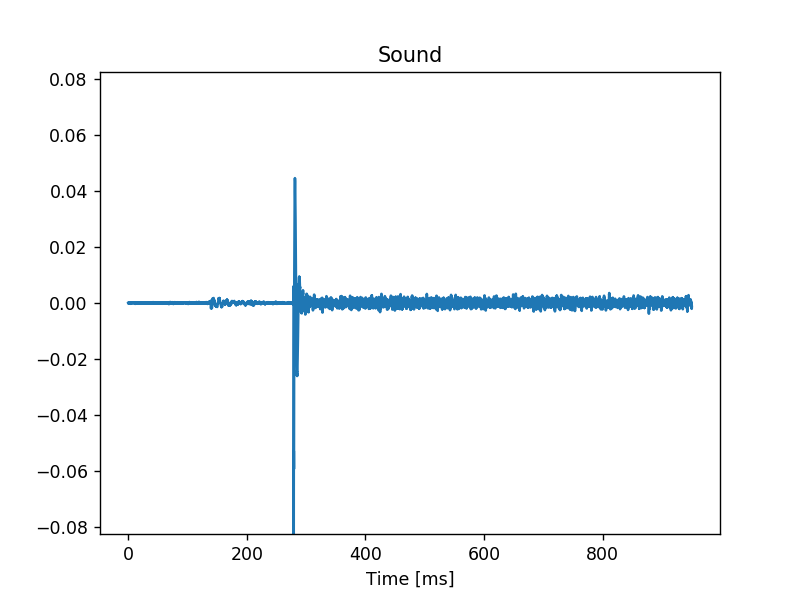

In [5]:
%matplotlib notebook
%matplotlib notebook

plotter = SoundPlotter(recorder=recorder)
plotter.start()

Try zooming in on the aobve signal. The sampling rate determines the distance between each sample and the resolution on the y axis is determined by the format of the stored values. If we use 16bit integers we can use 2^16 levels.  
Also note the full lines between each sample are just drawn here to get prettier plots. The only data we have are the blue dots at regularly spaced intervals.

# Sound consists of...
an infinite amount of sine waves at different frequencies and amplitudes.
Every sound-clip can be split into a number of sine waves at different frequencies with different amplitudes. Let us create a simple signal where we know the frequency content

In [6]:
minisound = miniSound(rate=44100, freq1=512, freq2=None, seconds=1)

In [9]:
minisound.playBack()

<IPython.core.display.Javascript object>


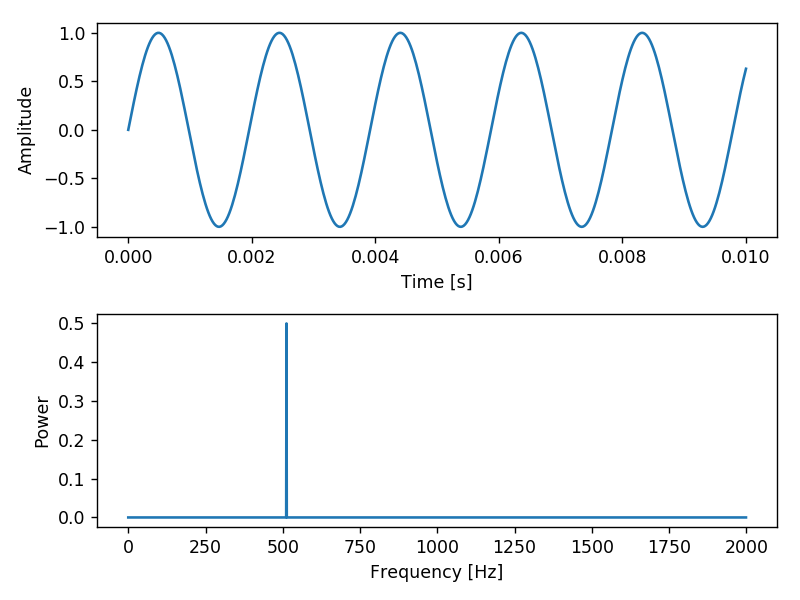

In [10]:
%matplotlib notebook
%matplotlib notebook

plotter = SoundPlotter2(miniSound=minisound)

The most simple signal we can think of is a single sine wave. We can listen to it, show its wave form and we can also compute the frequency content of it. This is done in the second plot. Right now we chose the frequency ourselves, so there is no surprise here, but we can also compute the frequency content of a signal that we did not define ourselves.
As you add more and more frequencies at different amplitudes, the signal becomes increasingly complex. 

# More sine waves

<IPython.core.display.Javascript object>


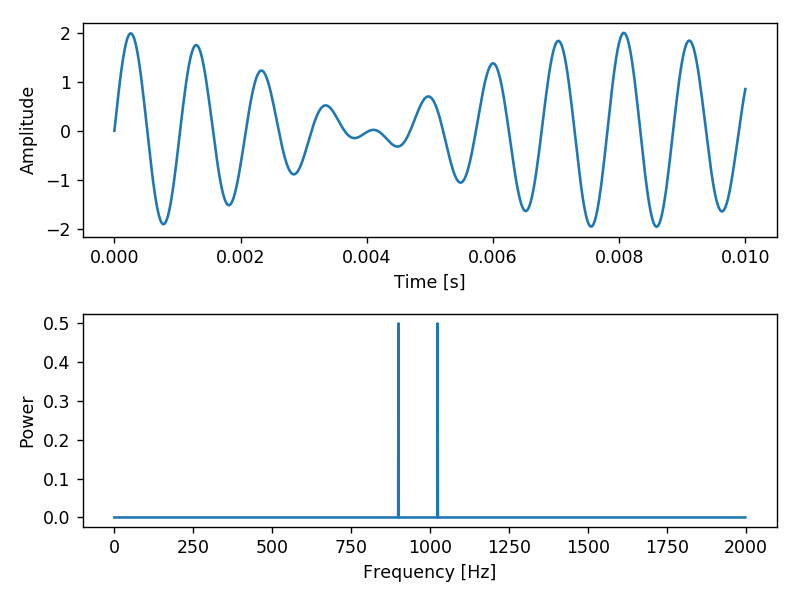

In [11]:
%matplotlib notebook
%matplotlib notebook

minisound = miniSound(rate=44100, freq1=1024, freq2=900, seconds=1)

plotter = SoundPlotter2(miniSound=minisound)

In [12]:
minisound.playBack()

# The frequency content of a signal
Below we will analyze the recording of your voice to see the frequency content of this signal. You can slide a window around the signal to see how the frequency content changes in different parts of the signal. The window can also be zoomed more in or out, to focus on only a specific part of the signal. Try to make a new recording where you whistle one long note. Can you find the frequency of this note?

<IPython.core.display.Javascript object>


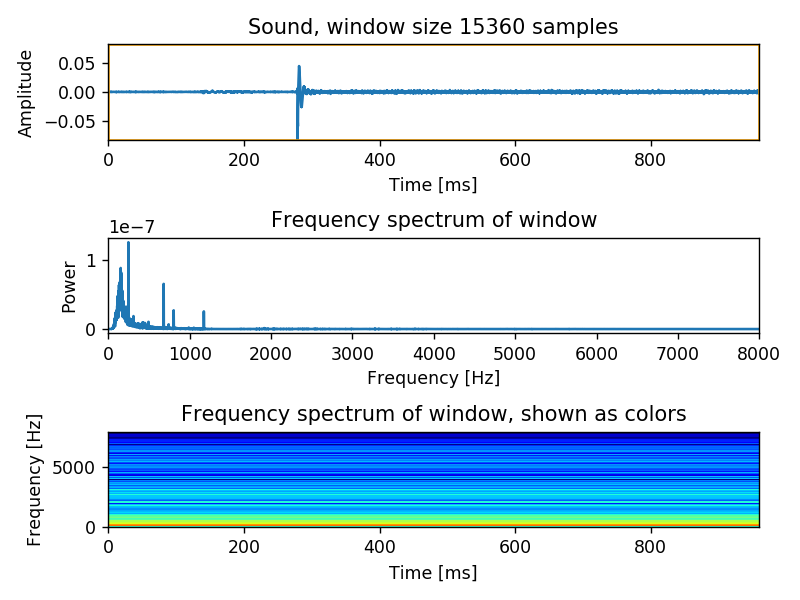

In [13]:
%matplotlib notebook
%matplotlib notebook

plotter = SoundPlotter3(recorder=recorder, log_y=False)
plotter.start()

We can illustrate the spectrum as colors. If we map the values of the spectrum between 0 and upper-limit to some colors, a colormap, we can illustrate the spectrum as the coloured plot above.  
Sometimes, if we plot the frequency spectrum on a log scale we can more easily see the differences between the power at the different frequencies.

# The spectrogram 
You have seen that we can find the frequency content of any part of a signal, and that we can display the amplitude of each frequency in the signal as colours.  
Now we use this idea to take a small window and move it along the signal. At every position we calculate the spectrum and then plot it vertically as colors, at the time instance which is the middle of the window. If we keep doing this we get what is called a spectrogram.

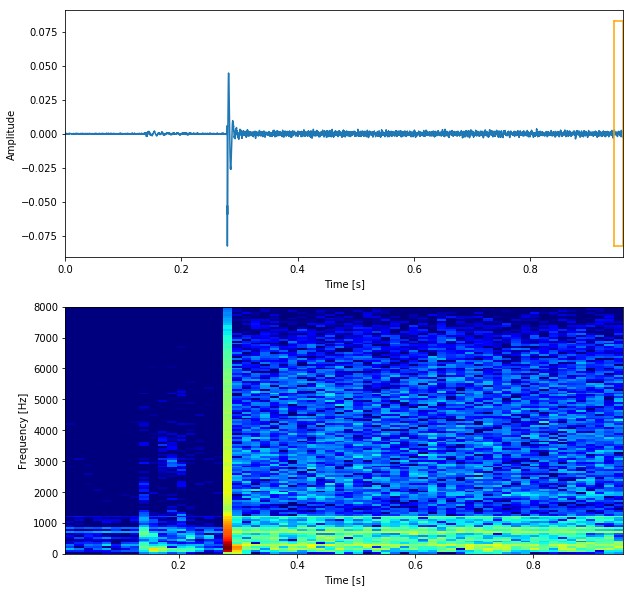

In [14]:
%matplotlib inline

spectrogramAnimation(recorder)

In [15]:
recorder.playback()

Here the spectrogram is calculated without overlapping windows, but this can easily be added to get a more finegrained x-scale

In [16]:
# amplitude invariant
# enheder, labels, colorbars
# EKG
# hvid støj
# oktaver, pitch, log
# instrumenter, toner op og ned
# simple filtering on the spectrum
# moving spectrogram

In [17]:
run_livespec()